# Рекоммендательная система для книжного магазина

---

## 0. Введение

Общая задача систем-рекомендаций заключается в улучшении опыта работы с клиентами посредством персонализированных рекомендаций на основе априорной обратной связи. Эти системы пассивно отслеживают различные виды поведения пользователей, такие как история покупок, просмотр привычек и активности в браузере, в зависимости от модели пользовательских настроек. В отличие от гораздо более обширно исследованных очевидных отзывов, у нас может не быть никакого прямого доступа пользователей к их предпочтениям. Предлагаю рассматривать данные как признаки положительного и отрицательного предпочтения, связанные с очень разными уровнями достоверности. Это приводит к факторной модели, которая специально предназначена для неявных рекомендаций обратной связи. Также предполагается масштабируемую процедуру оптимизации, которая линейно масштабируется с размером данных. Алгоритм успешно используется в системе рекомендаций для онлайн-магазинов. Он отлично согласуется с хорошо настроенными реализациями других известных методов.

По мере роста популярности электронной коммерции становится важной задача помочь клиентам разобраться в разнообразных предлагаемых продуктах, чтобы легко найти те, которые им понравятся наиболее вероятно. Одним из инструментов, которые решают эту проблему, являются системы рекомендаций, которые в последнее время привлекают много внимания. Эти системы предоставляют пользователям персональные рекомендации для продуктов или услуг, которые, в надежде, соответствуют их уникальному вкусу и потребностям. Технология этих систем основана на профилировании пользователей и продуктов, а также на том, как их связывать.

Вообще говоря, системы для рекомендаций основаны на двух разных стратегиях (или их комбинациях). Подход, основанный на содержании ("content-based approach"), создает профиль для каждого пользователя или продукта, чтобы охарактеризовать его свойства. Например, профиль книги может включать атрибуты в отношении её жанра, года выпуска, её популярность и т. д. Профили пользователей могут включать демографическую информацию или данные анкетирования. Полученные профили позволяют программам связывать пользователей с соответствующими продуктами. Однако стратегии на основе контента требуют сбора внешней информации, которая может быть недоступна или наоборот легко собираться.

Альтернативная стратегия опирается только на предыдущее поведение пользователя, не требуя создания явных профилей. Этот подход известен как «совместная (коллаборативная) фильтрация». CF анализирует отношения между пользователями и взаимозависимостями других продуктов, чтобы идентифицировать новые ассоциации пользовательских элементов. Например, некоторые CF-системы идентифицируют пары элементов, которые, как правило, оцениваются одинаково или единомышленниками с аналогичной историей оценки или покупки, чтобы вывести неизвестные отношения между пользователями и элементами. Единственная требуемая информация - это поведение пользователей в прошлом, которое может быть их предыдущими покупками или оценками продуктов. Основная привлекательность CF заключается в том, что он не является специфичным для какой-то конкретной области, но он может выявлять аспекты данных, которые часто становятся неуловимыми и очень трудными для профилирования с использованием методов, основанных на контенте. Хотя в целом он более точен, чем методы, основанные на содержании, CF страдает от проблемы с "холодным стартом" из-за его неспособности обращаться к продуктам, новым для системы, для которых основанные на содержании подходы будут адекватными.

Системы рекомендаций полагаются на различные типы входных данных. Наиболее удобной является явная обратная связь, которая включает явный вклад пользователей в отношении их интереса к продуктам. Однако явная обратная связь не всегда доступна. Таким образом, рекомендации могут вызывать пользовательские предпочтения из более распространенной неявной обратной связи, которая косвенно отражает мнение посредством наблюдения за поведением пользователя. Типы неявных отзывов включают историю покупок, историю просмотров, шаблоны поиска или даже движения мыши. Например, пользователь, который приобрел много книг одного и того же автора, вероятно, любит все его произведения.

Подавляющее большинство литературы в этой области сосредоточено на обработке явных отзывов; вероятно, благодаря удобству использования такой чистой информации. Однако во многих практических ситуациях системы для рекомендаций должны быть сосредоточены на неявной обратной связи. Это может отражать нежелание пользователей оценивать продукты или ограничения системы, которые не могут собрать явные отзывы. В неявной модели, как только пользователь дает разрешение на сбор данных об использовании, дополнительная информация (например, рейтинги) не требуются от пользователя.

Эта исследовательская работа проводит исследование алгоритмов, подходящих для обработки как явных отзывов, так и использованием неявных факторов при построении систем рекомендации для книжного магазина.

## Датасет

"__goodbooks-10k__" – содержит 6 млн. рейтингов для 10 тыс. самых популярных книг. Также входят:

* книги, отмеченные пользователями для прочтения позже;
* метаданные книг (автор, год издания и т.п.);
* теги/"полки"/жанры

https://github.com/zygmuntz/goodbooks-10k

## 1. Исследовательский (эксплоративный) анализ данных

In [1]:
%matplotlib inline

import pandas as pd

r = pd.read_csv( 'ratings.csv' )
tr = pd.read_csv( 'to_read.csv' )
b = pd.read_csv( 'books.csv' )

t = pd.read_csv( 'tags.csv' )
bt = pd.read_csv( 'book_tags.csv')


### Ratings

In [2]:
r.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


Рейтинги отсортированы по дате, наиболее старые – первые.

In [3]:
len(r)

5976479

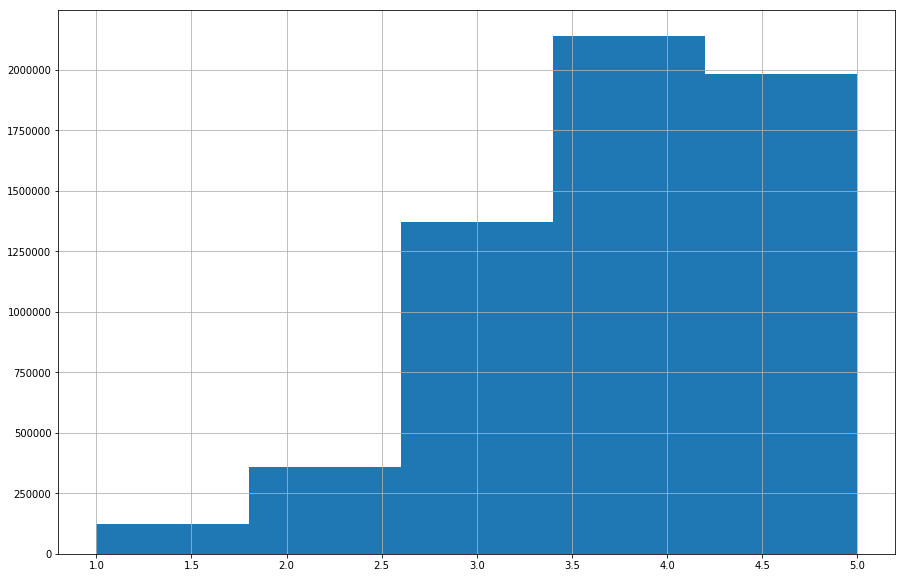

In [4]:
r.rating.hist( bins = 5, figsize=(15, 10) )

Оценка "4" самая популярная, при этом в датасете относительно мало единиц и двоек.

### To read
Книги, отмеченные для прочтения позже.

In [5]:
tr.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [6]:
len(tr)

912705

Большинство книг были отмечены для прочтения кем-нибудь из пользователей. Большинство пользователей отметили какие-либо книги для прочтения. 

In [7]:
len(tr.book_id.unique())

9986

In [8]:
len(tr.user_id.unique())

48871

### Books

In [9]:
b.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


Книги отсортированы по своей популярности (по общему количеству отзывов).

In [10]:
len(b)

10000

Самые популярные книги:

In [11]:
b['original_title'][:10]

0                            The Hunger Games
1    Harry Potter and the Philosopher's Stone
2                                    Twilight
3                       To Kill a Mockingbird
4                            The Great Gatsby
5                      The Fault in Our Stars
6          The Hobbit or There and Back Again
7                      The Catcher in the Rye
8                            Angels & Demons 
9                         Pride and Prejudice
Name: original_title, dtype: object

Книги с наибольшми количеством "пятёрок":

In [12]:
b.sort_values('ratings_5', ascending=False)['original_title'][:10]

1     Harry Potter and the Philosopher's Stone
0                             The Hunger Games
3                        To Kill a Mockingbird
2                                     Twilight
24        Harry Potter and the Deathly Hallows
5                       The Fault in Our Stars
17    Harry Potter and the Prisoner of Azkaban
23         Harry Potter and the Goblet of Fire
26      Harry Potter and the Half-Blood Prince
9                          Pride and Prejudice
Name: original_title, dtype: object

### User and book IDs

In [13]:
r.user_id.max()

53424

In [14]:
r.book_id.max()

10000

ID'шники последовательно заполняют диапазон.

In [15]:
assert( len( r.user_id.unique()) == r.user_id.max())
assert( len( r.book_id.unique()) == r.book_id.max())

Дубликатов оценок нет.

In [16]:
r.shape == r.drop_duplicates(['user_id', 'book_id']).shape

True

### Reviews per book

Большинство книг имеет несколько сотен отзывов, но некоторые не более восьми.

In [17]:
reviews_per_book = r.groupby('book_id').book_id.apply( lambda x: len( x ))
reviews_per_book.describe()

count    10000.000000
mean       597.647900
std       1267.289788
min          8.000000
25%        155.000000
50%        248.000000
75%        503.000000
max      22806.000000
Name: book_id, dtype: float64

In [18]:
reviews_per_book.sort_values().head( 10 )

book_id
7803     8
9345    11
9486    24
1935    33
9315    36
9553    41
8181    45
9479    48
9260    48
9705    50
Name: book_id, dtype: int64

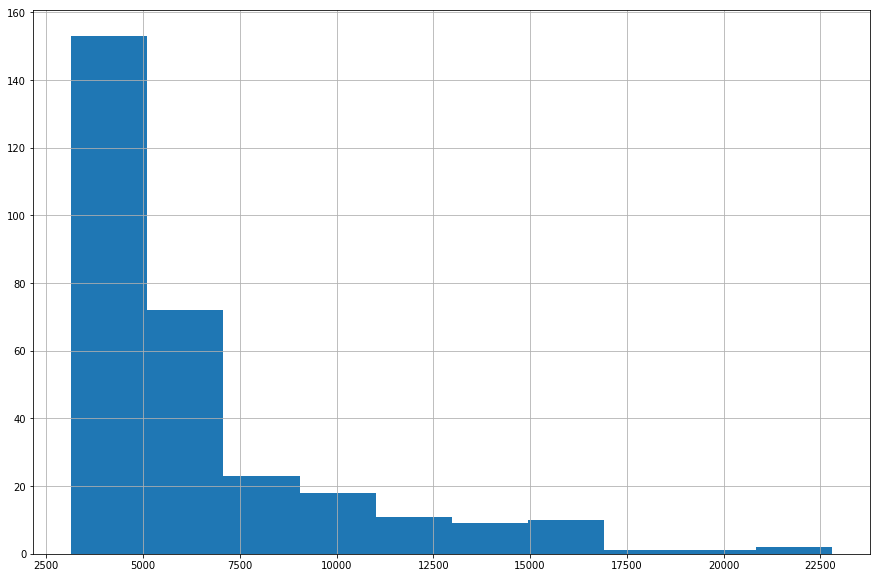

In [19]:
reviews_per_book.sort_values(ascending=False)[:300].hist(figsize=(15, 10))

### Reviews per user

Все пользователи имеют как минимум 19 отзывов.

In [20]:
reviews_per_user = r.groupby( 'user_id' ).user_id.apply( lambda x: len( x ))
reviews_per_user.describe()

count    53424.000000
mean       111.868804
std         26.071224
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: user_id, dtype: float64

In [21]:
reviews_per_user.sort_values().head( 10 )

user_id
34590    19
43675    20
40753    21
51725    21
32128    21
37640    22
16470    22
42736    22
48077    22
40299    22
Name: user_id, dtype: int64

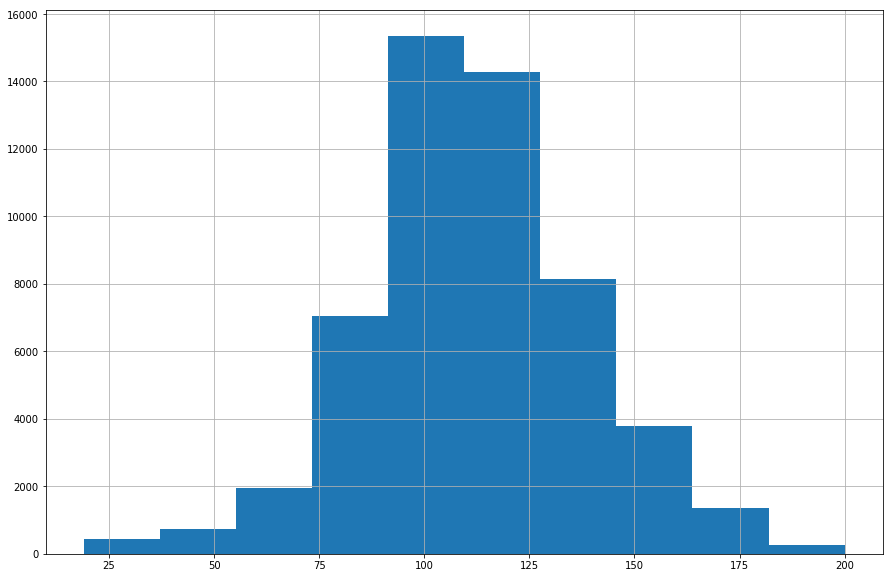

In [22]:
reviews_per_user.hist(figsize=(15, 10))

### Tags

'book_tags.csv' содержит теги/отложенные/жанры, присвоенные пользователями книгам.

In [23]:
t.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [24]:
len(t)

34252

In [25]:
bt.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


Теги отсортированы по "goodreads_book_id" по возрастанию и по количеству "проголосовавших" по убыванию.

In [26]:
len(bt)

999912

Смержим названия тегов.

In [27]:
bt = bt.merge( t, on = 'tag_id' )

Также добавим названия книг.

In [28]:
bt = bt.merge( b[[ 'goodreads_book_id', 'title']], on = 'goodreads_book_id' )

Оказалось, что есть теги с отрицательным количеством. Исправим это:

In [29]:
bt['count'].describe()

count    999912.000000
mean        208.869633
std        3501.265173
min          -1.000000
25%           7.000000
50%          15.000000
75%          40.000000
max      596234.000000
Name: count, dtype: float64

In [30]:
bt.loc[ bt['count'] < 0, 'count'] = 0

Приведем примеры некоторых популярных тегов:

In [31]:
bt.sample( 10, weights = 'count')

,goodreads_book_id,tag_id,count,tag_name,title
167300,24337,30574,58484,to-read,Ella Enchanted
737214,8546358,18045,124,library,The Peach Keeper
910794,18143977,30574,505884,to-read,All the Light We Cannot See
581894,1137215,30574,33105,to-read,"Boneshaker (The Clockwork Century, #1)"
511194,454856,30574,5226,to-read,Look Me in the Eye: My Life with Asperger's
935065,20578940,27199,259,series,"The Iron Trial (Magisterium, #1)"
958412,23012475,30574,10962,to-read,The Knockoff
723294,7937843,30574,302652,to-read,Room
584394,1215032,30574,77589,to-read,"The Wise Man's Fear (The Kingkiller Chronicle,..."
493794,375013,30574,105724,to-read,Schindler's List


Самые популярные теги:

In [32]:
tag_counts = bt.groupby( 'tag_name' ).tag_name.count().sort_values( ascending = False )
tag_counts.head( 20 )

tag_name
to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
library              9415
owned-books          9221
fiction              9097
to-buy               8692
kindle               8316
default              8239
ebook                8054
my-books             7561
audiobook            7242
ebooks               7203
wish-list            7192
my-library           7000
audiobooks           6862
i-own                6670
adult                6604
Name: tag_name, dtype: int64

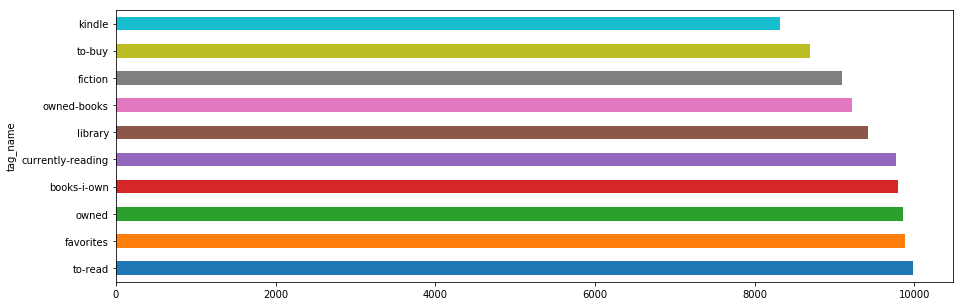

In [33]:
tag_counts[:10].plot.barh(figsize=(15,5))

Выделим жанры отдельно:

In [34]:
genres = [genre.lower() for genre in ["Art", "Biography", "Business", "Chick Lit", "Children's", "Christian",
                                      "Classics", "Comics", "Cookbooks", "Crime",
                                      "Fantasy", "Gay and Lesbian", "Graphic Novels", "Historical Fiction",
                                      "History", "Horror", "Humor and Comedy", "Manga", "Memoir", "Music",
                                      "Mystery", "Paranormal", "Philosophy", "Poetry", "Psychology",
                                      "Religion", "Romance", "Science", "Science Fiction", "Self Help", "Suspense",
                                      "Spirituality", "Sports", "Thriller", "Travel", "Young Adult"]]

In [35]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

genres = tag_counts.loc[genres].dropna().astype(int).sort_values(ascending=False)
genres

tag_name
fantasy         4259
romance         4251
mystery         3686
classics        2785
thriller        2522
suspense        2419
history         2138
crime           2083
paranormal      1941
horror          1372
science         1239
biography       1109
philosophy      1055
memoir           905
religion         893
psychology       810
spirituality     503
comics           469
travel           457
art              436
poetry           377
business         377
christian        357
music            226
manga            196
sports           196
cookbooks         92
Name: tag_name, dtype: int32

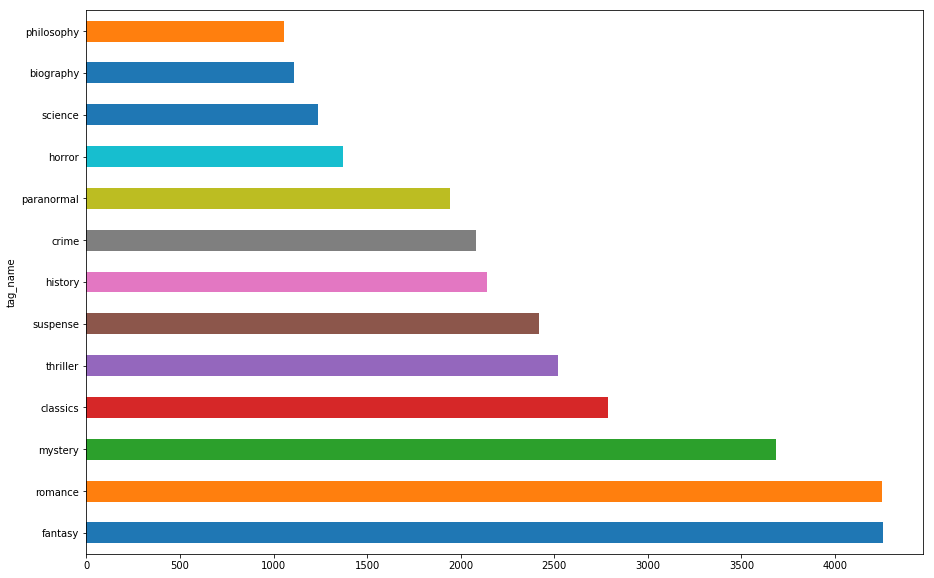

In [24]:
genres[:13].plot.barh(figsize=(15,10))

In [1]:
import dill
dill.load_session('notebook_env.db')

## 2. Baseline модель для рекомендаций (с использованием библиотеки Spotlight)

__Spotlight__ - библиотека для постройки рекомендательных систем на основе библиотеки для глубинного обучения __PyTorch__.

Построим и оценим модель, которая учитывает явные оценки пользователей книгам, чтобы рекомендовать новые. Для этого будем использовать подход с использованием факторизации матриц:

Начнём с тройки чисел "__пользователь__-__книга__-__рейтинг__", выражающей информацию об оценке __r , которую некоторый пользователь i__ выставил книге __j__.

Представлением пользователей и книг является вектора больших размерностей, например пользователь может быть представлен [0.3, -1.2, 0.5], а книга как [1.0, -0.3, -0.6].

Эти представления должны быть выбраны таким способом, чтобы при перемножении соответствующих векторов получались исходные оценки.

Таким образом при перемножении представления пользователя с книгой, которую он ещё не оценивал, мы должны получить предполагаемый рейтинг для этой книги от данного пользователя. Ранжировав результаты, мы можем выдать список книг с рекомендациями к прочтению.

Spotlight обучает модель с использованием стохастического градиентного спуска. Последовательность примерно следующая:

Начнаем со случайных представлений пользователей и книг. По скольку они "рандомные", при перемножении он будут давать плохие рекомендации, но по мере обучения модели предсказанные значения рейтингов должны начать совпадать с исходными данными.

Проходя через каждую тройку "пользователь-книга-рейтинг", считаем рейтинг и сравниваем с реальным значением. Чем они ближе, тем лучше.

Если предсказанная оценка слишком мала, то корректируем векторные представления пользователей и книг на небольшую величину, чтобы увеличить значение предсказания. Аналогично если оценка велика, то корректируем соответствующие представления для уменьшения предсказанного значения.
Продолжаем до тех пор, пока "accuracy" модели не стабилизируется.

In [29]:
# подгрузим данные
import numpy as np

from spotlight.datasets.goodbooks import get_goodbooks_dataset

dataset = get_goodbooks_dataset()
dataset.ratings = dataset.ratings.astype(np.float32)
print(dataset)

<Interactions dataset (53425 users x 10001 items x 5976479 interactions)>


In [30]:
# разделим данные на 'train' и 'test'
from spotlight.cross_validation import random_train_test_split

train, test = random_train_test_split(dataset, random_state=np.random.RandomState(42))

print('Split into \n {} and \n {}.'.format(train, test))

Split into 
 <Interactions dataset (53425 users x 10001 items x 4781183 interactions)> and 
 <Interactions dataset (53425 users x 10001 items x 1195296 interactions)>.


In [31]:
# Используем модель "ExplicitFactorizationModel",
# в качестве функции потерь – среднеквадратическая ошибка (RMSE).

import torch
use_cuda = False
use_cuda = torch.cuda.is_available() # закомментировать для ноутбука

from spotlight.factorization.explicit import ExplicitFactorizationModel
from spotlight.evaluation import rmse_score

from time import sleep

In [36]:
# За десять эпох найдем оптимальное количество размерностей представлений пользователей и книг

best_embedding_dim = None
best_rmse = np.inf

for rnk in range(10,260,20):
    print("Проверяю модель при embedding_dim = {}".format(rnk))
    
    model = ExplicitFactorizationModel(loss='regression',
                                       embedding_dim=rnk,  # latent dimensionality
                                       n_iter=10,  # number of epochs of training
                                       batch_size=1024,  # minibatch size
                                       l2=1e-9,  # strength of L2 regularization
                                       learning_rate=1e-3,
                                       use_cuda=use_cuda)

    model.fit(train, verbose=False) # обучаем

    if use_cuda: # валидируем на CPU для избежания ошибок переполнения памяти
        model._use_cuda = False
        model._net = model._net.cpu()

    with torch.no_grad():
        current_rmse = rmse_score(model, test)
    if current_rmse < best_rmse:
        best_rmse = current_rmse
        best_embedding_dim = rnk
        print('Получено лучшее значение RMSE: {}'.format(best_rmse))

    print('Продолжаю...\n')
    del(model)
    sleep(3)

print("Оптимальное значение 'embedding_dim' = {}".format(best_embedding_dim))

Проверяю модель при embedding_dim = 10
Получено лучшее значение RMSE: 0.8289409875869751
Продолжаю...

Проверяю модель при embedding_dim = 30
Продолжаю...

Проверяю модель при embedding_dim = 50
Продолжаю...

Проверяю модель при embedding_dim = 70
Продолжаю...

Проверяю модель при embedding_dim = 90
Продолжаю...

Проверяю модель при embedding_dim = 110
Продолжаю...

Проверяю модель при embedding_dim = 130
Продолжаю...

Проверяю модель при embedding_dim = 150
Продолжаю...

Проверяю модель при embedding_dim = 170
Продолжаю...

Проверяю модель при embedding_dim = 190
Продолжаю...

Проверяю модель при embedding_dim = 210
Продолжаю...

Проверяю модель при embedding_dim = 230
Продолжаю...

Проверяю модель при embedding_dim = 250
Продолжаю...

Оптимальное значение 'embedding_dim' = 10


In [42]:
# Создадим модель с найденными оптимальными параметрами

model = ExplicitFactorizationModel(loss='regression',
                                   embedding_dim=best_embedding_dim,  # latent dimensionality
                                   n_iter=30,  # number of epochs of training
                                   batch_size=1024,  # minibatch size
                                   l2=1e-9,  # strength of L2 regularization
                                   learning_rate=1e-3,
                                   use_cuda=use_cuda)

In [43]:
# Обучаем модель за тридцать эпох
model.fit(train, verbose=True)

Epoch 0: loss 7.641110681313264
Epoch 1: loss 0.8844043715097154
Epoch 2: loss 0.7113592302263166
Epoch 3: loss 0.6878698701393936
Epoch 4: loss 0.6691209503619012
Epoch 5: loss 0.6536089086941018
Epoch 6: loss 0.639903717837446
Epoch 7: loss 0.6273436675873252
Epoch 8: loss 0.6158147851392084
Epoch 9: loss 0.6054260496026188
Epoch 10: loss 0.596301717076618
Epoch 11: loss 0.5884983434411647
Epoch 12: loss 0.5818741852262035
Epoch 13: loss 0.5761328652150115
Epoch 14: loss 0.5712393143319981
Epoch 15: loss 0.5670980504799706
Epoch 16: loss 0.5634986473993264
Epoch 17: loss 0.5603070263561396
Epoch 18: loss 0.5575001783429683
Epoch 19: loss 0.5550135383450244
Epoch 20: loss 0.552846752371982
Epoch 21: loss 0.5507564332998284
Epoch 22: loss 0.5489209775240569
Epoch 23: loss 0.5472038849262916
Epoch 24: loss 0.5455953993748802
Epoch 25: loss 0.5440727671157625
Epoch 26: loss 0.5427244481744297
Epoch 27: loss 0.5414225108107867
Epoch 28: loss 0.5401602438928228
Epoch 29: loss 0.53899333235

In [44]:
# оценим предсказания модели

if use_cuda: # валидируем на CPU для избежания ошибок переполнения памяти
    model._use_cuda = False
    model._net = model._net.cpu()

with torch.no_grad():
    train_rmse = rmse_score(model, train)
    test_rmse = rmse_score(model, test)

print('Train RMSE {:.3f}, test RMSE {:.3f}'.format(train_rmse, test_rmse))

Train RMSE 0.715, test RMSE 0.846


In [193]:
# Используем модель "ImplicitFactorizationModel",
# в качестве функции потерь – среднеквадратическая ошибка (RMSE).

from spotlight.factorization.implicit import ImplicitFactorizationModel

In [199]:
# За десять эпох найдем оптимальное количество размерностей представлений пользователей и книг

best_embedding_dim = None
best_rmse = np.inf

for rnk in range(10,260,20):
    print("Проверяю модель при embedding_dim = {}".format(rnk))
    
    model = ImplicitFactorizationModel(loss='bpr',
                                       embedding_dim=rnk,  # latent dimensionality
                                       n_iter=5,  # number of epochs of training
                                       batch_size=1024,  # minibatch size
                                       l2=1e-9,  # strength of L2 regularization
                                       learning_rate=1e-3,
                                       use_cuda=use_cuda)

    model.fit(train, verbose=False) # обучаем

    if use_cuda: # валидируем на CPU для избежания ошибок переполнения памяти
        model._use_cuda = False
        model._net = model._net.cpu()

    with torch.no_grad():
        current_rmse = rmse_score(model, test)
    if current_rmse < best_rmse:
        best_rmse = current_rmse
        best_embedding_dim = rnk
        print('Получено лучшее значение RMSE: {}'.format(best_rmse))

    print('Продолжаю...\n')
    del(model)
    sleep(3)

print("Оптимальное значение 'embedding_dim' = {}".format(best_embedding_dim))

Проверяю модель при embedding_dim = 10
Получено лучшее значение RMSE: 4.280876636505127
Продолжаю...

Проверяю модель при embedding_dim = 30
Продолжаю...

Проверяю модель при embedding_dim = 50
Продолжаю...

Проверяю модель при embedding_dim = 70
Продолжаю...

Проверяю модель при embedding_dim = 90
Продолжаю...

Проверяю модель при embedding_dim = 110
Продолжаю...

Проверяю модель при embedding_dim = 130
Продолжаю...

Проверяю модель при embedding_dim = 150
Продолжаю...

Проверяю модель при embedding_dim = 170
Продолжаю...

Проверяю модель при embedding_dim = 190
Продолжаю...

Проверяю модель при embedding_dim = 210
Продолжаю...

Проверяю модель при embedding_dim = 230
Продолжаю...

Проверяю модель при embedding_dim = 250
Продолжаю...

Оптимальное значение 'embedding_dim' = 10


In [200]:
# Создадим модель с найденными оптимальными параметрами

model = ImplicitFactorizationModel(loss='bpr',
                                   embedding_dim=best_embedding_dim,  # latent dimensionality
                                   n_iter=5,  # number of epochs of training
                                   batch_size=1024,  # minibatch size
                                   l2=1e-9,  # strength of L2 regularization
                                   learning_rate=1e-3,
                                   use_cuda=use_cuda)

In [201]:
# Обучаем модель за тридцать эпох
model.fit(train, verbose=True)

Epoch 0: loss 0.35296723873571867
Epoch 1: loss 0.20371091372834027
Epoch 2: loss 0.15589492898554055
Epoch 3: loss 0.13110946235775436
Epoch 4: loss 0.11546274677748598


In [202]:
# оценим предсказания модели

if use_cuda: # валидируем на CPU для избежания ошибок переполнения памяти
    model._use_cuda = False
    model._net = model._net.cpu()

with torch.no_grad():
    train_rmse = rmse_score(model, train)
    test_rmse = rmse_score(model, test)

print('Train RMSE {:.3f}, test RMSE {:.3f}'.format(train_rmse, test_rmse))

Train RMSE 4.388, test RMSE 4.392


## 3. Коллаборативная фильтрация (с использованием библиотеки __Surprise__)

Коллаборивная фильтрация является стандартным методом для рекомендаций. Чтобы получить общую идею, рассмотрим этот пример:

Представьте, что вы хотите прочитать новую книгу, но вы не знаете, какую из них стоит прочитать. У вас есть определенный друг, с которым вы говорили о некоторых книгах, и вы, как правило, придерживались такого же мнения по этим книгам. Тогда было бы неплохо спросить этого друга, читал ли он и любил ли какие-то книги, которые вы еще не знаете. Это были бы хорошие кандидаты для вашей следующей книги.

То, что я описал выше, является в точности основной идеей так называемой '__user-based collaborative filtering__'. Он работает следующим образом:

    Сначала вы определяете других пользователей, похожих на текущего пользователя, с точки зрения их рейтингов по одному и тому же набору книг.

Например, если вам нравятся все книги «Властелин колец», вы определяете пользователей, которым также нравились эти книги.

    Если вы нашли этих похожих пользователей, вы берете их средний рейтинг книг, которых текущий пользователь еще не прочитал...

Итак, как эти любители «Властелин колец» оценивали другие книги? Возможно, они высоко оценили «Хоббит».

    ... и рекомендуете им книги с самым высоким средним рейтингом.

Соответственно, «Хоббит» имеет высокий средний рейтинг и может быть рекомендован вам.

С использованием библиотеки Surprise – проекта Python scikit для построения и анализа систем рекомендаций. Был разработан с учетом следующих целей: дать пользователям полный контроль над своими экспериментами. С этой целью большое внимание уделяется документации, где указана каждая деталь алгоритмов.

Предоставлены различные готовые к использованию алгоритмы прогнозирования, такие как базовые алгоритмы, методы соседства, основанные на матричной факторизации (SVD, PMF, SVD ++, NMF) , и много других. Кроме того, встроены различные меры сходства (косинус, MSD, pearson, …). Их можно использовать для реализации новых идей алгоритмов. Предоставляйте инструменты для оценки, анализа и сравнения производительности алгоритмов. Процедуру кросс-валидации можно легко запускать с использованием мощных итераторов CV (вдохновленных превосходными инструментами scikit-learn), а также исчерпывающий поиск по набору параметров.

In [37]:
from surprise import Dataset
from surprise import Reader

# Преобразуем исходную матрицу оценок для работы с библиотекой Surprise
ratings_dict = {'itemID': r['book_id'].as_matrix(),
                'userID': r['user_id'].as_matrix(),
                'rating': r['rating'].as_matrix()}
df = pd.DataFrame(ratings_dict)
df.head()

# Диапазон рейтингов
reader = Reader(rating_scale=(1, 5))

# Столбцы должны идти в следующем порядке: [user id, item id, ratings].
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
del(df); del(ratings_dict)

In [38]:
from surprise.model_selection import train_test_split

# разбиваем на обучающую и валидационную выборки
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [39]:
from surprise import KNNBasic, KNNWithMeans, SVD, SlopeOne, CoClustering
from surprise.evaluate import accuracy

from tqdm import tqdm

models_score_dict = dict()

def get_model_accuracy(model, train, test, additional_name=None):
    global models_score_dict
    
    model_name = model.__class__.__name__
    if additional_name:
        model_name += '__' + '_'.join(additional_name.strip().split())
    print('\nОцениваю модель: {}'.format(model_name))
    model.fit(train)
    print('Получаю рекомендации на валидационном наборе...')
    predictions = model.test(testset)
    score = accuracy.rmse(predictions)
    models_score_dict[model_name] = score

Наиболее распространенный подход к CF основан на моделях соседства. Его первоначальная форма, которой разделяли практически все предыдущие системы CF, ориентирована на пользователей. Такие ориентированные на пользователя методы оценивают неизвестные рейтинги на основе зарегистрированных рейтингов единомышленников. Позже стал популярным аналогичный "item-based" подход, ориентированный на продукты. В этих методах рейтинг оценивается с использованием известных оценок, сделанных одним и тем же пользователем на аналогичных элементах. Улучшенная масштабируемость и улучшенная точность делают во многих случаях данный подход более предпочтительным. Кроме того, предметно-ориентированные методы более поддаются объяснению обоснования предсказаний. Это связано с тем, что пользователи знакомы с предметами, которые ранее были предпочтительнее, но обычно не знают своих единомышленников.

In [40]:
%%time
# обучаем модель
algo = KNNBasic(
    k=50,
    min_k=5,
    sim_options={
        "user_based": False,
        "sim_options": "msd"
    }
)

get_model_accuracy(algo, trainset, testset, additional_name='k=50 min_k=5 similarity=MSD')


Оцениваю модель: KNNBasic__k=50_min_k=5_similarity=MSD
Computing the msd similarity matrix...
Done computing similarity matrix.
Получаю рекомендации на валидационном наборе...
RMSE: 0.8678
Wall time: 3min 27s


In [42]:
%%time
# обучаем модель
algo = KNNBasic(
    k=100,
    min_k=3,
    sim_options={
        "user_based": False,
        "sim_options": "cosine"
    }
)

get_model_accuracy(algo, trainset, testset, additional_name='k=100 min_k=3 similarity=cosine')


Оцениваю модель: KNNBasic__k=100_min_k=3_similarity=cosine
Computing the msd similarity matrix...
Done computing similarity matrix.
Получаю рекомендации на валидационном наборе...
RMSE: 0.8828
Wall time: 3min 28s


In [41]:
%%time
# обучаем модель
algo = KNNBasic(
    k=75,
    min_k=7,
    sim_options={
        "user_based": False,
        "sim_options": "pearson"
    }
)

get_model_accuracy(algo, trainset, testset, additional_name='k=75 min_k=7 similarity=pearson')


Оцениваю модель: KNNBasic__k=75_min_k=7_similarity=pearson
Computing the msd similarity matrix...
Done computing similarity matrix.
Получаю рекомендации на валидационном наборе...
RMSE: 0.8768
Wall time: 3min 38s


In [43]:
%%time
# обучаем модель
algo = KNNWithMeans(
    sim_options={
        "user_based": False
    }
)

get_model_accuracy(algo, trainset, testset)


Оцениваю модель: KNNWithMeans
Computing the msd similarity matrix...
Done computing similarity matrix.
Получаю рекомендации на валидационном наборе...
RMSE: 0.8458
Wall time: 3min 22s


In [44]:
%%time
# обучаем модель
algo = SlopeOne()

get_model_accuracy(algo, trainset, testset)


Оцениваю модель: SlopeOne
Получаю рекомендации на валидационном наборе...
RMSE: 0.8475
Wall time: 2min 23s


## 4. Singular Value Decomposition

Скрытые (латентные) факторные модели включают альтернативный подход к коллаборативной фильтрации с более полной целью выявления скрытых признаков, которые объясняют наблюдаемые оценки. При этом сосредотачиваются на моделях, вызванных сингулярной разложением векторов (SVD) матрицы оценок "user-item". В последнее время модели SVD завоевали популярность благодаря их привлекательной точности и масштабируемости. Типичная модель связывает каждого пользователя с вектором пользовательских факторов и каждым элемент с вектором факторов продуктов. Прогнозирование выполняется путем взятия скалярного произведения соответствующих вектором.

![title](svd.png)

In [45]:
def get_model_instance_accuracy(model, train, test, additional_name=None):
    model_name = model.__class__.__name__
    if additional_name:
        model_name += '__' + '_'.join(additional_name.strip().split())
    model.fit(train)
    predictions = model.test(testset)
    score = accuracy.rmse(predictions, verbose=False)
    return model, score

In [46]:
%%time
# обучаем модель
algo = SVD()

get_model_accuracy(algo, trainset, testset)


Оцениваю модель: SVD
Получаю рекомендации на валидационном наборе...
RMSE: 0.8316
Wall time: 4min 31s


In [48]:
%%time
# обучаем модель
algo = CoClustering()

get_model_accuracy(algo, trainset, testset)


Оцениваю модель: CoClustering
Получаю рекомендации на валидационном наборе...
RMSE: 0.8558
Wall time: 2min 23s


In [49]:
models_score_dict

{'KNNBasic__k=50_min_k=5_similarity=MSD': 0.8677536282987447,
 'KNNBasic__k=75_min_k=7_similarity=pearson': 0.8767608655048799,
 'KNNBasic__k=100_min_k=3_similarity=cosine': 0.882772967186151,
 'KNNWithMeans': 0.84583386532168,
 'SlopeOne': 0.8474682468281882,
 'SVD': 0.8316401479923712,
 'CoClustering': 0.8558208847356295}

## 5. Различные модели (с использованием библиотеки __Implicit__)

Построим разреженную матрицу пользователей-книг, на пересечении строк и столбцов которой находятся проставленные рейтинги (или 0 при их отсутствии).

![title](user-item.jpg)

In [82]:
from scipy.sparse import coo_matrix
import numpy as np
import tqdm

user_item_matrix = coo_matrix((
    (r["rating"]).astype(np.int8),
    (r["user_id"], r["book_id"])
))

user_item_matrix.eliminate_zeros()
# user_item_matrix = user_item_matrix.tocsr()
user_item_matrix

<53425x10001 sparse matrix of type '<class 'numpy.int8'>'
	with 5976479 stored elements in COOrdinate format>

In [7]:
from implicit.als import AlternatingLeastSquares
from implicit.approximate_als import (AnnoyAlternatingLeastSquares, FaissAlternatingLeastSquares,
                                      NMSLibAlternatingLeastSquares)
from implicit.bpr import BayesianPersonalizedRanking
from implicit.nearest_neighbours import (BM25Recommender, CosineRecommender,
                                         TFIDFRecommender, bm25_weight)

In [8]:
from implicit.utils import check_blas_config
check_blas_config()

In [9]:
import os
os.environ['MKL_NUM_THREADS'] = '1'

In [10]:
# делим разреженную матрицу на обучающую и тестовую
total_len = user_item_matrix.data.size
train_len = int(total_len * 0.8)
all_indices = np.arange(total_len)
np.random.seed(42)
train_indices = np.random.choice(all_indices, train_len, replace=False)
train_mask = np.in1d(all_indices, train_indices)

In [11]:
print(all_indices)
print(train_indices)
print(train_mask)
print(len(train_mask))

[      0       1       2 ... 5976476 5976477 5976478]
[3623535 3985638 2983642 ... 3426317 5778554 4400609]
[ True  True  True ...  True  True  True]
5976479


In [12]:
from scipy.sparse import coo_matrix

def get_masked(arr, mask):
    return coo_matrix(
        (
            [np.float32(item) for item in arr.data[mask]],
            (arr.row[mask], arr.col[mask])
        ),
        arr.shape
    )

In [13]:
train_csr = get_masked(user_item_matrix, train_mask).tocsr()
# для обучения нужна item*user матрица
train = train_csr.T
test_coo = get_masked(user_item_matrix, ~train_mask)
test_csr = test_coo.tocsr()

In [14]:
users = set(test_coo.row)

# первично выберем модель, оцениваясь только на 10 тыс. пользователей
small_users = list(users)[:10000]

In [18]:
models_scores_dict = {}

def get_recs(users, model, verbose=True):
    recs_dict = {}
    if verbose:
        iteration_of = tqdm.tqdm
    else:
        iteration_of = lambda x:x
    for user in iteration_of(users):
        recs_dict[user] = model.recommend(userid=user, user_items=train_csr, N=50)
    return recs_dict

def precision_implicit(k, recs, users, model=None, verbose=True):
    num_users = 0
    sum_user_prec = .0
    if verbose:
        with tqdm.tqdm(total=len(users)) as progress:
            for user in users:
                if recs.get(user):
                    num_users += 1
                    rec_items, _ = zip(*recs[user])
                    user_prec = float(len(set(rec_items[:k]).intersection(set(test_csr[user].indices)))) / k
                    sum_user_prec += user_prec
                progress.update(1)
    else:
        for user in users:
            if recs.get(user):
                num_users += 1
                rec_items, _ = zip(*recs[user])
                user_prec = float(len(set(rec_items[:k]).intersection(set(test_csr[user].indices)))) / k
                sum_user_prec += user_prec
    mean = sum_user_prec / num_users
    if model:
        model_name = model.__class__.__name__
        global models_scores_dict
        models_scores_dict[model_name] = mean
    return mean

In [127]:
als = AlternatingLeastSquares()

In [128]:
%%time

als.fit(train)

100%|████████████████████████████████████████████████████████████████████████████████| 15.0/15 [00:19<00:00,  1.44s/it]


Wall time: 19.9 s


In [87]:
%%time

# посчитаем по 50 рекомендаций для каждого пользователя из тестовой выборки
recs = get_recs(small_users, als)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1995.20it/s]


Wall time: 5.01 s


In [88]:
%%time

print("precision@50:", precision_implicit(50, recs, users, als), '\n')

100%|█████████████████████████████████████████████████████████████████████████| 53422/53422 [00:00<00:00, 65768.74it/s]


precision@50: 0.15966799999999765 

Wall time: 812 ms


In [89]:
approx_als = NMSLibAlternatingLeastSquares()

In [91]:
%%time

approx_als.fit(train)

100%|████████████████████████████████████████████████████████████████████████████████| 15.0/15 [00:18<00:00,  1.35s/it]


Wall time: 19 s


In [94]:
%%time

# посчитаем по 50 рекомендаций для каждого пользователя из тестовой выборки
recs = get_recs(small_users, approx_als)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4452.41it/s]


Wall time: 2.28 s


In [95]:
%%time

print("precision@50:", precision_implicit(50, recs, users, approx_als), '\n')

100%|█████████████████████████████████████████████████████████████████████████| 53422/53422 [00:00<00:00, 67029.49it/s]


precision@50: 0.15654399999999763 

Wall time: 797 ms


In [96]:
bpr = BayesianPersonalizedRanking()

In [97]:
%%time

bpr.fit(train)

100%|█████████████████████████████████████████████████| 100/100 [01:00<00:00,  1.67it/s, correct=93.37%, skipped=5.26%]


Wall time: 1min


In [98]:
%%time

# посчитаем по 50 рекомендаций для каждого пользователя из тестовой выборки
recs = get_recs(small_users, bpr)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2147.33it/s]


Wall time: 4.69 s


In [100]:
%%time

print("precision@50:", precision_implicit(50, recs, users, bpr), '\n')

100%|█████████████████████████████████████████████████████████████████████████| 53422/53422 [00:00<00:00, 65740.68it/s]


precision@50: 0.07596199999999795 

Wall time: 813 ms


In [103]:
annoy_als = AnnoyAlternatingLeastSquares()

In [104]:
%%time

annoy_als.fit(train)

100%|████████████████████████████████████████████████████████████████████████████████| 15.0/15 [00:19<00:00,  1.45s/it]


Wall time: 22.5 s


In [105]:
%%time

# посчитаем по 50 рекомендаций для каждого пользователя из тестовой выборки
recs = get_recs(small_users, annoy_als)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1018.96it/s]


Wall time: 9.85 s


In [106]:
%%time

print("precision@50:", precision_implicit(50, recs, users, annoy_als), '\n')

100%|█████████████████████████████████████████████████████████████████████████| 53422/53422 [00:00<00:00, 67029.57it/s]


precision@50: 0.12446799999999587 

Wall time: 797 ms


In [107]:
tfidf = TFIDFRecommender()

In [108]:
%%time

tfidf.fit(train)

100%|█████████████████████████████████████████████████████████████████████████| 10001/10001 [00:00<00:00, 10158.14it/s]


Wall time: 1.43 s


In [109]:
%%time

# посчитаем по 50 рекомендаций для каждого пользователя из тестовой выборки
recs = get_recs(small_users, tfidf)

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 14881.26it/s]


Wall time: 703 ms


In [110]:
%%time

print("precision@50:", precision_implicit(50, recs, users, tfidf), '\n')

100%|█████████████████████████████████████████████████████████████████████████| 53422/53422 [00:00<00:00, 68370.00it/s]


precision@50: 0.15750999999999815 

Wall time: 781 ms


In [111]:
cosine = CosineRecommender()

In [112]:
%%time

cosine.fit(train)

100%|██████████████████████████████████████████████████████████████████████████| 10001/10001 [00:01<00:00, 9551.72it/s]


Wall time: 1.42 s


In [113]:
%%time

# посчитаем по 50 рекомендаций для каждого пользователя из тестовой выборки
recs = get_recs(small_users, cosine)

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 14220.29it/s]


Wall time: 719 ms


In [114]:
%%time

print("precision@50:", precision_implicit(50, recs, users, cosine), '\n')

100%|█████████████████████████████████████████████████████████████████████████| 53422/53422 [00:00<00:00, 67058.99it/s]


precision@50: 0.15793399999999794 

Wall time: 797 ms


In [118]:
bm25 = BM25Recommender()

In [120]:
%%time

bm25.fit(train, True)

100%|█████████████████████████████████████████████████████████████████████████| 10001/10001 [00:00<00:00, 10491.30it/s]


Wall time: 1.35 s


In [121]:
%%time

# посчитаем по 50 рекомендаций для каждого пользователя из тестовой выборки
recs = get_recs(small_users, bm25)

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 13065.38it/s]


Wall time: 781 ms


In [122]:
%%time

print("precision@50:", precision_implicit(50, recs, users, bm25), '\n')

100%|█████████████████████████████████████████████████████████████████████████| 53422/53422 [00:00<00:00, 67028.74it/s]


precision@50: 0.1506199999999968 

Wall time: 813 ms


In [129]:
models_scores_dict

{'AlternatingLeastSquares': 0.15966799999999765,
 'NMSLibAlternatingLeastSquares': 0.15654399999999763,
 'BayesianPersonalizedRanking': 0.07596199999999795,
 'AnnoyAlternatingLeastSquares': 0.12446799999999587,
 'TFIDFRecommender': 0.15750999999999815,
 'CosineRecommender': 0.15793399999999794,
 'BM25Recommender': 0.1506199999999968}

In [130]:
best_model = sorted(models_scores_dict, key=models_scores_dict.get, reverse=True)[0]
print("Лучшая модель - {}, precision@50 - {:.4f}".format(
                    best_model,                   models_scores_dict[best_model]))

Лучшая модель - AlternatingLeastSquares, precision@50 - 0.1597


Настраиваем оптимальные модели: __TFIDFRecommender__ и __CosineRecommender__

In [131]:
def custom_grid_search_search(parameters_dict, model_class):

    def create_list_of_parameters_combinations(param_dict, func):
        # use only valid keyword arguments for given 'func'
        import inspect
        arguments = list(inspect.signature(func.__init__).parameters)
        valid_arguments_dict = dict()
        for arg, range_of_values in param_dict.items():
            if arg in arguments:
                try:
                    # must be a list, range, etc...
                    iter(range_of_values)
                except TypeError:
                    pass
                except:
                    pass
                else:
                    valid_arguments_dict[arg] = range_of_values

        list_of_parameters_combinations = []
        def recursive_argument_looping(list_of_args, previous_args_and_values_dict={}):
            # fill all possible combinations of valid parameters
            if list_of_args[0:1]:
                nonlocal valid_arguments_dict
                argument = list_of_args[0]
                range_of_values = valid_arguments_dict[argument]
                for value in range_of_values:
                    previous_dict_copy = previous_args_and_values_dict.copy()
                    previous_dict_copy[argument] = value
                    recursive_argument_looping(
                        list_of_args[1:],
                        previous_args_and_values_dict=previous_dict_copy)
            else:
                nonlocal list_of_parameters_combinations
                list_of_parameters_combinations.append(previous_args_and_values_dict)

        recursive_argument_looping(list(valid_arguments_dict.keys()), {})
        return list_of_parameters_combinations

    best_model = None
    best_parameters_combination = []
    best_score = 0
    parameters_combinations = create_list_of_parameters_combinations(parameters_dict, model_class)
    for parameters_combination in tqdm.tqdm(parameters_combinations):
        # searching model with highest score
        model = model_class(**parameters_combination)
        model.fit(train)
        recs = get_recs(small_users, model, verbose=False)
        score = precision_implicit(50, recs, users, verbose=False)
        if score > best_score:
            best_score = score
            best_model = model
            best_parameters_combination = parameters_combination

    print('==='*10)
    print('\nЛучшие параметры:')
    from pprint import pprint
    pprint(best_parameters_combination)
    print('\nЛучший precision@50: {}'.format(best_score))
    return best_model, best_parameters_combination, best_score

In [136]:
%%time
parameters_grid = {
    'K': list(range(5, 106, 10))
}

best_tfidf_model, best_tfidf_parameters, best_tfidf_precision = \
    custom_grid_search_search(parameters_grid, TFIDFRecommender)

 36%|██████████████████████████▍                                               | 3579/10001 [00:00<00:00, 32696.02it/s]


 34%|████████████████████████▉                                                 | 3366/10001 [00:00<00:00, 30538.53it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:36<00:00,  3.48s/it]



Лучшие параметры:
{'K': 5}

Лучший precision@50: 0.1688999999999973
Wall time: 36.2 s


In [137]:
models_scores_dict['TFIDFRecommender_tuned'] = best_tfidf_precision

In [138]:
%%time
parameters_grid = {
    'K': list(range(5, 106, 10))
}

best_cosine_model, best_cosine_parameters, best_cosine_precision = \
    custom_grid_search_search(parameters_grid, CosineRecommender)

 66%|████████████████████████████████████████████████▌                         | 6569/10001 [00:00<00:00, 13441.56it/s]


 49%|████████████████████████████████████▍                                     | 4923/10001 [00:00<00:00, 15930.46it/s]


 45%|█████████████████████████████████▏                                        | 4492/10001 [00:00<00:00, 15121.96it/s]


 26%|██████████████████▉                                                       | 2560/10001 [00:00<00:00, 18464.02it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:37<00:00,  3.57s/it]



Лучшие параметры:
{'K': 5}

Лучший precision@50: 0.1692259999999976
Wall time: 37.5 s


In [139]:
models_scores_dict['CosineRecommender_tuned'] = best_cosine_precision

Обучим __CosineRecommender_tuned__ на всех пользователях и оценим precision@50

In [140]:
best_cosine_model = CosineRecommender(**best_cosine_parameters)

In [16]:
%%time

best_cosine_model.fit(train)

100%|█████████████████████████████████████████████████████████████████████████| 10001/10001 [00:00<00:00, 10402.82it/s]


Wall time: 1.31 s


In [19]:
%%time

# посчитаем по 50 рекомендаций для всех пользователей
recs = get_recs(users, best_cosine_model)

100%|█████████████████████████████████████████████████████████████████████████| 53422/53422 [00:02<00:00, 20077.44it/s]


Wall time: 2.66 s


In [20]:
%%time

best_precision = precision_implicit(50, recs, users)
print("precision@50:", best_precision, '\n')

100%|█████████████████████████████████████████████████████████████████████████| 53422/53422 [00:04<00:00, 13115.93it/s]


precision@50: 0.1717416045824054 

Wall time: 4.08 s


In [144]:
models_scores_dict['CosineRecommender_tuned_all_users'] = best_precision

In [145]:
models_scores_dict

{'AlternatingLeastSquares': 0.15966799999999765,
 'NMSLibAlternatingLeastSquares': 0.15654399999999763,
 'BayesianPersonalizedRanking': 0.07596199999999795,
 'AnnoyAlternatingLeastSquares': 0.12446799999999587,
 'TFIDFRecommender': 0.15750999999999815,
 'CosineRecommender': 0.15793399999999794,
 'BM25Recommender': 0.1506199999999968,
 'TFIDFRecommender_tuned': 0.1688999999999973,
 'CosineRecommender_tuned': 0.1692259999999976,
 'CosineRecommender_tuned_all_users': 0.1717416045824054}

In [146]:
best_model = sorted(models_scores_dict, key=models_scores_dict.get, reverse=True)[0]
print("Лучшая модель - {}, precision@50 - {:.4f}".format(
                    best_model,                   models_scores_dict[best_model]))

Лучшая модель - CosineRecommender_tuned_all_users, precision@50 - 0.1717


### Дадим рекомендации случайному пользователю

In [34]:
from random import randint
random_user_id = randint(min(users), max(users))
random_user_id

51271

In [117]:
liked_books_ids = np.where(np.asarray(user_item_matrix.todense()[random_user_id])[0] == 5)[0]
liked_books_ids

array([   8,   26,   29,   40,   59,   66,   87,  122,  123,  124,  131,
        140,  143,  172,  174,  177,  213,  225,  257,  300,  316,  317,
        367,  476,  485,  597,  637,  689,  710,  730,  767,  773,  791,
        819,  868,  869,  872,  993, 1041, 1158, 1222, 1316, 1364, 1460,
       1466, 1520, 1569, 1685, 1709, 1842, 1859, 1980, 2009, 2010, 2365,
       2481, 2578, 2663, 2736, 2927, 2939, 3197, 3333, 3523, 4027, 4253,
       4383, 4865, 5437, 6806], dtype=int64)

In [126]:
print("Книги, которые понравились данному пользователю:")
list(b.loc[b['book_id'].isin(liked_books_ids)].head(10)['original_title'])

Книги, которые понравились данному пользователю:


['The Catcher in the Rye',
 'The Da Vinci Code',
 'An Excellent conceited Tragedie of Romeo and Juliet',
 "Eat, pray, love: one woman's search for everything across Italy, India and Indonesia",
 "Charlotte's Web",
 'Gone with the Wind',
 'Un di Velt Hot Geshvign',
 'Wicked: The Life and Times of the Wicked Witch of the West',
 'The Firm',
 'Room']

In [55]:
recommended_books_ids = [x[0] for x in best_cosine_model.recommend(userid=random_user_id,
                          user_items=get_masked(user_item_matrix, np.in1d(all_indices, all_indices)).tocsr(),
                          N=10)]
recommended_books_ids

[4, 5263, 31, 32, 5, 3175, 14, 5905, 8781, 267]

In [125]:
print("Книги, которые рекомендуются данному пользователю:")
list(b.loc[b['book_id'].isin(recommended_books_ids)].head(10)['original_title'])

Книги, которые рекомендуются данному пользователю:


['To Kill a Mockingbird',
 'The Great Gatsby',
 'Animal Farm: A Fairy Story',
 'The Help',
 'Of Mice and Men ',
 'The Nightingale',
 'Odd Hours',
 'The Full Cupboard of Life',
 'Blue Shoes and Happiness ',
 'Strip Tease']

### Найдем похожие книги

In [159]:
random_book_id = randint(min(range(user_item_matrix.shape[1])), max(range(user_item_matrix.shape[1])))
random_book_name = list(b.loc[b['book_id'].isin((random_book_id,))].head(10)['original_title'])[0]
random_book_id

1299

In [160]:
similiar_books_ids = [x[0] for x in best_cosine_model.similar_items(random_book_id)][1:]
similiar_books_ids

[1503, 3027, 2025, 2274]

In [161]:
print('Похожие книги на "{}":'.format(random_book_name))
list(b.loc[b['book_id'].isin(similiar_books_ids)].head(10)['original_title'])

Похожие книги на "Still Life with Woodpecker":


['Jitterbug Perfume',
 'Even Cowgirls Get the Blues',
 'Skinny Legs and All',
 'Another Roadside Attraction']

## 6. Библиотека __Tensorrec__ (основана на TensorFlow)

__TensorRec__ предсказывает оценки и рекомендации, используя фичи пользователей и книг ("айдишники", теги и другие метаданные), и далее строит две матрицы низкой размерности: представления пользователей и представления книг. Скалярное произведение этих двух векторов дает оценку для данного пользователя и данной книги – чем выше рейтинг, тем более вероятный кандидат для рекомендации.

Для построения рекомендательной системы используются графы __TensorFlow__ с целью:

    Представить входные данные в виде тензоров-"ембедингов".
    Преобразовать фичи пользователей/книг в соответсвующие функции-представления.
    Пару таких представлений преобразовать в "предсказание".
    Предсказания и истинные значения использовать для вычисления функции потерь.

![title](tensorrec.png)

Подготовим данные

In [136]:
#interactions
interactions = user_item_matrix.tocsr()

#user_features
from scipy.sparse import lil_matrix
user_item_matrix = user_item_matrix.tocsr()
user_features = lil_matrix((user_item_matrix.shape[0], 1), dtype=np.int32)

for user in range(user_item_matrix.shape[0]):
    user_features[user, 0] = user_item_matrix[user].count_nonzero()

user_features = user_features.tocoo()

#item_features
item_features = lil_matrix((user_item_matrix.shape[1], 10), dtype=np.int8)

books_with_tags = bt.groupby('goodreads_book_id')['tag_name'].apply(set).to_frame().reset_index()
books_with_tags = pd.merge(b[['book_id', 'goodreads_book_id']], books_with_tags, how='left', on='goodreads_book_id').drop('goodreads_book_id', axis=1).set_index('book_id')

for book_id in books_with_tags.index:
    for feature_index, genre in enumerate(genres[:10].index):
        if genre in books_with_tags.loc[book_id][0]:
            item_features[book_id, feature_index] = 1

item_features = item_features.tocoo()

Построим и обучим модель

In [145]:
import tensorrec

# Build the model with default parameters
model = tensorrec.TensorRec(n_components=10)

# Fit the model for 5 epochs
model.fit(interactions, user_features, item_features, epochs=10, verbose=True)

# Predict scores and ranks for all users and all items
predictions = model.predict(user_features=user_features,
                            item_features=item_features)
predicted_ranks = model.predict_rank(user_features=user_features,
                                     item_features=item_features)

# Calculate and print the recall at 10
r_at_k = tensorrec.eval.recall_at_k(predicted_ranks, interactions, k=10)
print(np.mean(r_at_k))

0.00341786512141733


## 7. Библиотека __Lit2Vec__

Использую 'Cbow' версию алгоритма Word2Vec на данных Goodbooks, были "натренированы" вектора-представления книг.
Т.е. выполнили кластеризацию книг на основе истории оценок пользователей.

"
_The training algorithm sets a label as a book in a users list of books that they read, and a batch as the average vector of several other books in that users list, the data being filtered to remove all average or negative reviews_.

_Perhaps that would result in locations being together some times. I noticed that there was a grouping of books set in NY (Sex and the City, Devil Wears Prada, Lipstick Jungle, etc.)_

_I mentioned I'm using the word2vec algorithm, but instead of a word and it's corresponding neighbors in a sentence, it's a book and other books reviewed by the same user (I filtered the data to only contain reviews of 4 or 5 out of 5)._
"

https://github.com/Santosh-Gupta/Lit2Vec

In [147]:
%matplotlib inline
import collections
import math
import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
from matplotlib import pyplot
from sklearn.manifold import TSNE

In [148]:
b = pd.read_csv( 'books.csv' )
bookDictionary = b.set_index('book_id').to_dict()['title']
AuthorDictionary = b.set_index('book_id').to_dict()['authors']

Подгрузим натренированную нейронную сеть:

In [149]:
with tf.Session() as sess:
  saver = tf.train.import_meta_graph('./MODEL/bookVec.ckpt.meta')
  saver.restore(sess, './MODEL/bookVec.ckpt' )

  embeddings = tf.get_default_graph().get_tensor_by_name('embeddings:0') #Getting regular embeddings
  softmax_weights = tf.get_default_graph().get_tensor_by_name('softmax_weights:0') #Get softmax embeddings
  
  normSM = tf.sqrt(tf.reduce_sum(tf.square(softmax_weights), 1, keepdims=True))
  normalized_embeddingsSM = softmax_weights / normSM
  
  norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keepdims=True))
  normalized_embeddings = embeddings / norm
  
  final_embeddings = normalized_embeddings.eval()
  final_embeddingsSM = normalized_embeddingsSM.eval()

Код ниже используется для нахождения самых близких книг к выбранной. С помощью 'book_id' выбирается соответствующее представление (embedding) книги, далее скалярным произведением между этим представлением и всеми остальными находятся наиболее похожие книги и выводятся на печать.

In [150]:
#James and the Giant Peach Roald Dahl, Quentin Blake  | Book ID:  335

JaneA = np.take(final_embeddings, 335, axis=0) 
similarityJaneA = np.matmul(JaneA, np.transpose(final_embeddings))

nearestJaneA = (-similarityJaneA).argsort()[0:15]

print('Most similiar to ', bookDictionary[nearestJaneA[0]], 'by',  AuthorDictionary[nearestJaneA[0]], '\n')

for k in range(0, 15):
  print(bookDictionary[nearestJaneA[k]], AuthorDictionary[nearestJaneA[k]])

Most similiar to  James and the Giant Peach by Roald Dahl, Quentin Blake 

James and the Giant Peach Roald Dahl, Quentin Blake
The Witches Roald Dahl, Quentin Blake
The BFG Roald Dahl, Quentin Blake
Charlie and the Chocolate Factory (Charlie Bucket, #1) Roald Dahl, Quentin Blake
Matilda Roald Dahl, Quentin Blake
The Twits Roald Dahl, Quentin Blake
Where the Wild Things Are Maurice Sendak
Danny the Champion of the World Roald Dahl, Quentin Blake
Fantastic Mr. Fox Roald Dahl, Quentin Blake
Charlie and the Great Glass Elevator (Charlie Bucket, #2) Roald Dahl, Quentin Blake
George's Marvellous Medicine Roald Dahl, Quentin Blake
Charlotte's Web E.B. White, Garth Williams, Rosemary Wells
The Lorax Dr. Seuss
The Cat in the Hat Dr. Seuss
The Very Hungry Caterpillar Board Book Eric Carle


__t-SNE__ (t-distributed stochastic neighbor embedding) - техника нелинейного снижения размерности и визуализации многомерных данных.

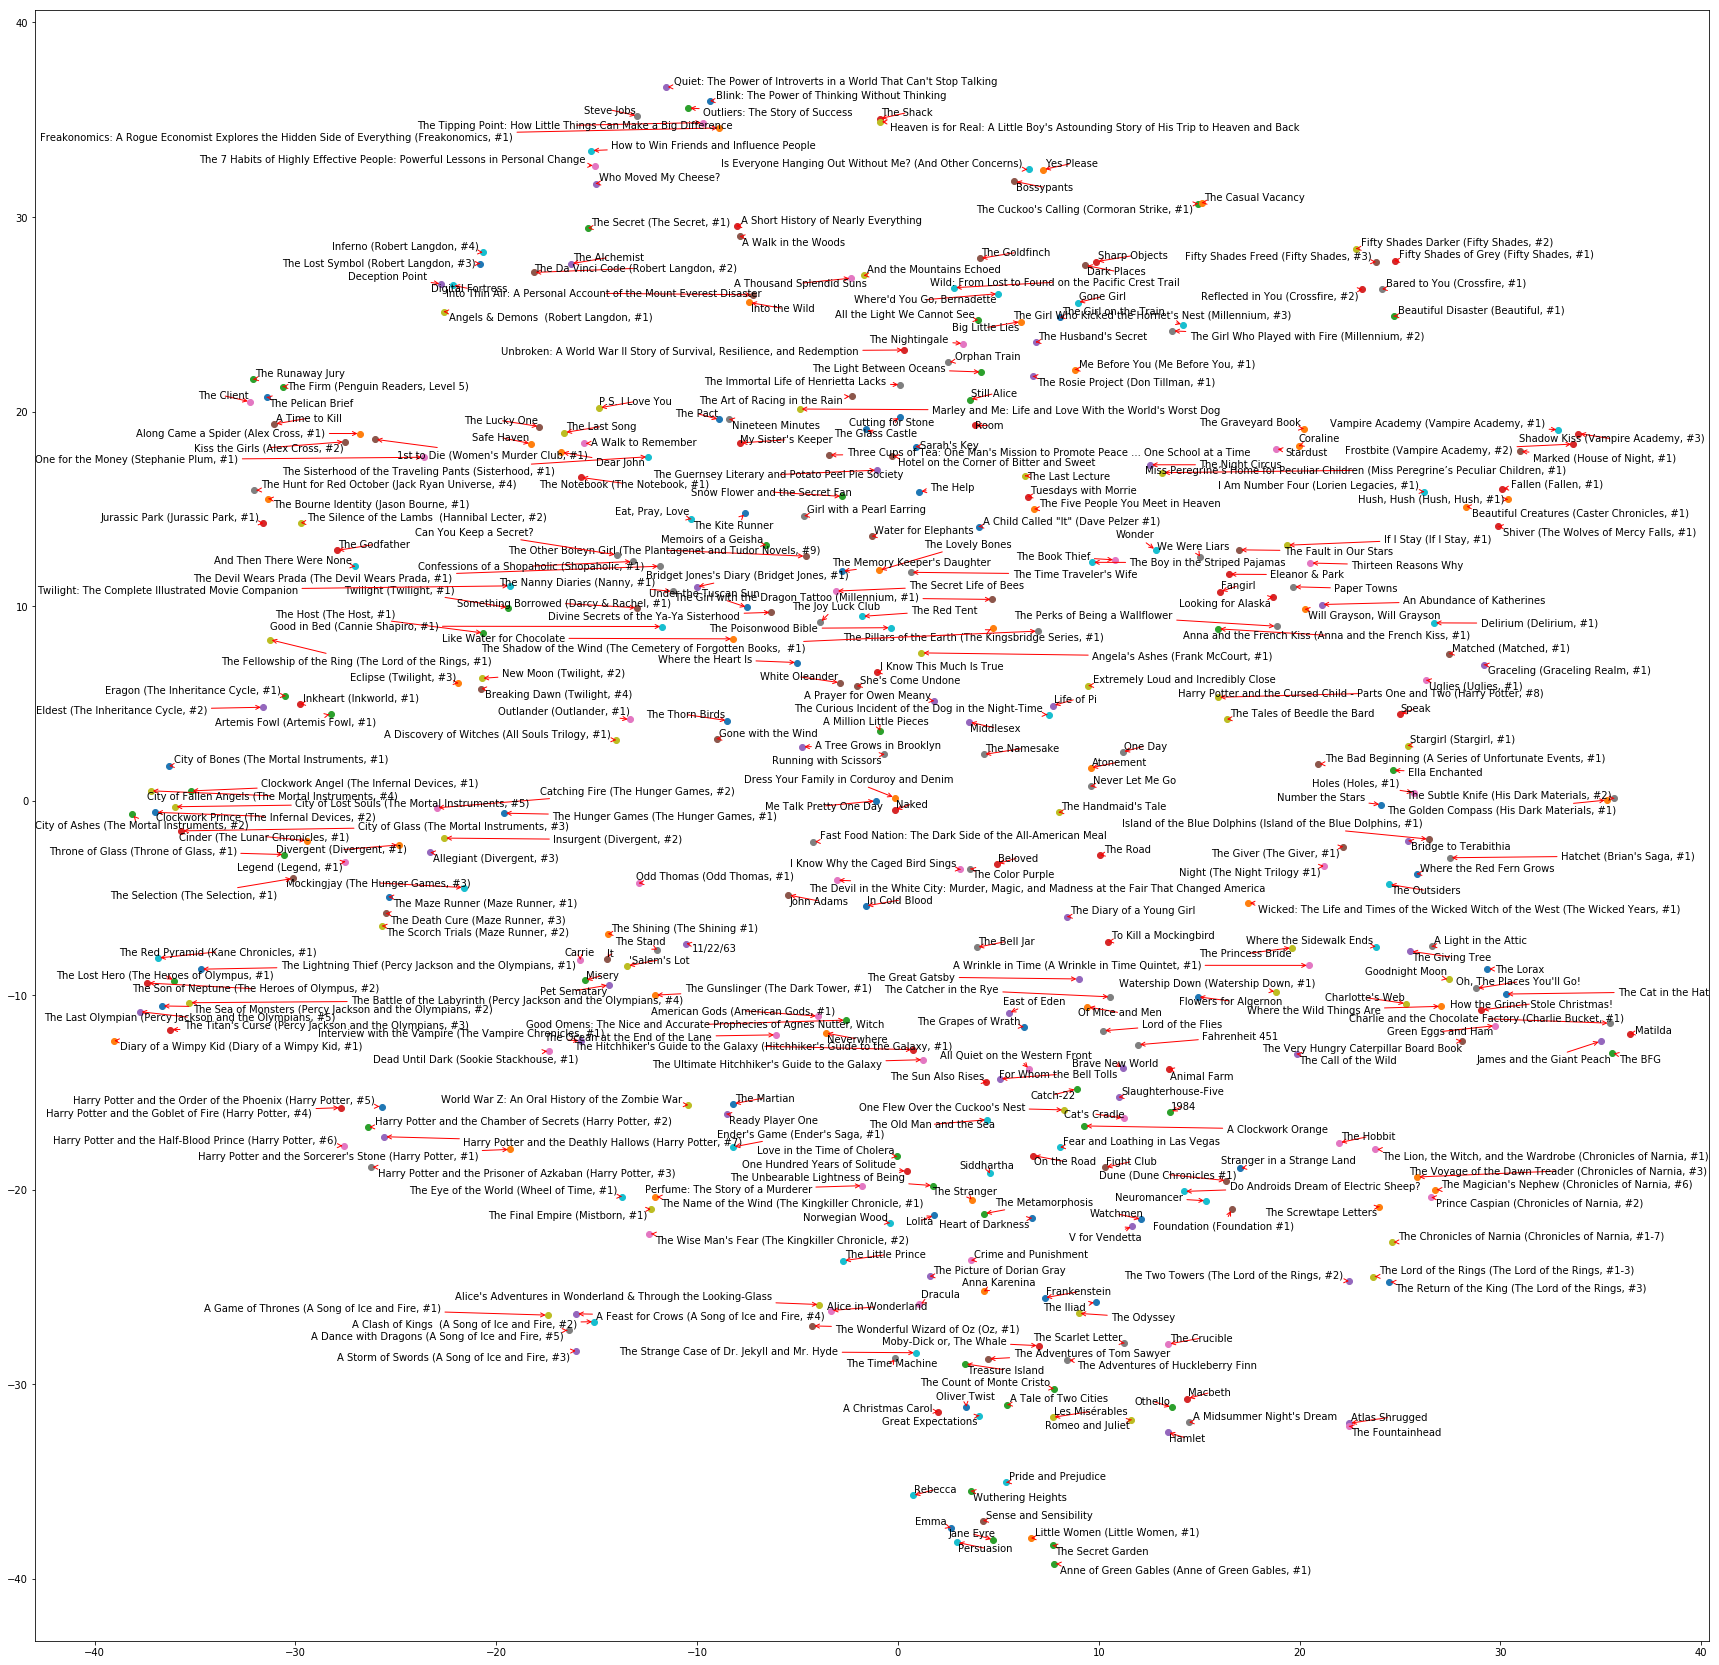

In [155]:
#Plot book embeddings 

from adjustText import adjust_text

num_points2 = 400
books = [bookDictionary[i] for i in range(1, num_points2+1)]

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
two_d_embeddings = tsne.fit_transform(final_embeddings[1:num_points2+1, :])
two_d_embeddingsSM = tsne.fit_transform(final_embeddingsSM[1:num_points2+1, :])

texts = []

def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  pyplot.figure(figsize=(30, 30))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    pyplot.scatter(x, y)
    #pyplot.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   #ha='right', va='bottom')
    texts.append(pyplot.text(x, y, label)) #Creates better plots but takes a long time. To save time, comment this, and uncomment the pyplot.annotate line
  adjust_text(texts , arrowprops=dict(arrowstyle='->', color='red'))
  pyplot.show()

plot(two_d_embeddings, books)

## 8. Выводы

Принято считать, что хорошая рекомендательная система должна сопровождаться объяснением своих предложений, которое является кратким описанием того, почему конкретный продукт был рекомендован пользователю. Это помогает повысить доверие пользователей к системе и их способность выносить рекомендации в правильной перспективе. Кроме того, это бесценное средство для отладки системы и отслеживания источника неожиданного поведения. Предоставление объяснений методам, основанным на окрестности, является простым, поскольку рекомендации непосредственно выводятся из прошлого поведения пользователей. Однако для моделей с скрытым фактором объяснения становятся более сложными, так как все прошлые действия пользователя абстрагируются с помощью факторов пользователя, тем самым блокируя прямую связь между предыдущими действиями пользователей и рекомендациями.

Что делает хорошую рекомендательную систему? Онлайн-оценка: при развертывании новой системы рекомендаций, самый верный тест - это A/B-тест с существующей системой. Наиболее эффективная обратная связь связана с опросом пользователей и мониторингом поведения пользователей. Если нет существующей системы, необходимо выполняйте поэтапные действия с обратной связью. Опрос пользователей - это хороший способ оценить качество рекомендаций.

В данной исследовательской работе были рассмотрены различные варианты рекомендательных систем для книжного магазина. Основным выводом является то, что все подходы дают различное качество рекомендаций, при этом важно оценивать их с точки зрения скорости обучения и получения предсказаний. Следующим шагом развития данных систем являются использование совместных систем для рекомендаций, полагающихся на взаимосвязанную работу нескольких более простых алгоритмов, рассмотренных выше.

## 9. Источники

* "__Collaborative Filtering for Implicit Feedback Datasets__" Y.Hu, Y.Koren, C.Volinsky
* "__Applications of the conjugate gradient method for implicit feedback collaborative filtering__" G.Takács, I.Pilászy, D.Tikk
* "__Recommender Systems: The Textbook__" Charu C. Aggarwal
* "__Implicit Documentaion__" www.implicit.readthedocs.io 
* "__Tensorrec Wiki__" www.github.com/jfkirk/tensorrec/wiki
* "__Нетология__" - лекции по курсу рекомендательных систем